# **Idea: Cleaning Data**

## Topic- New York City Airbnb Open Data
In this project, we will work with a dataset of New York City properties advertised on the platform. This dataset contains information about the prices, locations, reviews, room types, hosts, and more for over 50,000 rooms.

Our main goal is to perform data cleaning is the process of fixing or removing incorrect, corrupted, duplicate, or incomplete data within a dataset. 
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now let's read the data into a DataFrame.

In [19]:
ny = pd.read_csv('AB_NYC_2019.csv')

## **Exploring the Dataset**

Before we perform any analysis, we'll first see what our dataset looks like. These are the variables it contains:

* id - id number that identifies the property
* name - Property name
* host_id - id number that identifies the host
* host_name - Host name
* neighbourhood_group - The main regions of the city
* neighbourhood - The neighbourhoods
* latitude - Property latitude
* longitude - Property longitude
* room_type - Type of the room
* price - The price for one night
* minimum_nights - Minimum amount of nights to book the place
* number_of_reviews - Number of reviews received
* last_review - Date of the last review
* reviews_per_month - Amount of reviews per month
* calculated_host_listings_count - Number of properties available on Airbnb owned by the host
* availability_365 - Number of days of availability within 365 days

Now let's display its first five rows.

In [20]:
ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Using the `info` method, we'll be able to see the size of the dataset as well as some information about each column, such as the number of non-null values and the type of the data it contains.

In [21]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We can now see the amount of data we have: 50,246 rows and 16 columns.

Notice that some columns contain null data. This is usually not good. Let's investigate if the number of null values is significant and then decide what to do with it.

In [22]:
(round(ny.isnull().sum() / ny.shape[0] * 100, 2)).sort_values(ascending=False)

last_review                       20.56
reviews_per_month                 20.56
host_name                          0.04
name                               0.03
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

Good news! Only the `last_review` and `reviews_per_month` columns contain a significant amount of null values. As both of these columns are not the focus of our analysis, this will not be a problem. Later in this project, we will drop them.

The `name` and `host_name` columns also contain null values, but this also will not affect our project since we are not performing any analysis on them. Also, the number of null values is irrelevant.

In [32]:
# Making sure if any duplicatd values.
ny.duplicated().sum()

0

We do not have any duplicate rows in our dataset.

### **Variable Distribution**

We'll now plot some histograms in order to see the distribution for each variable and start looking for outliers.

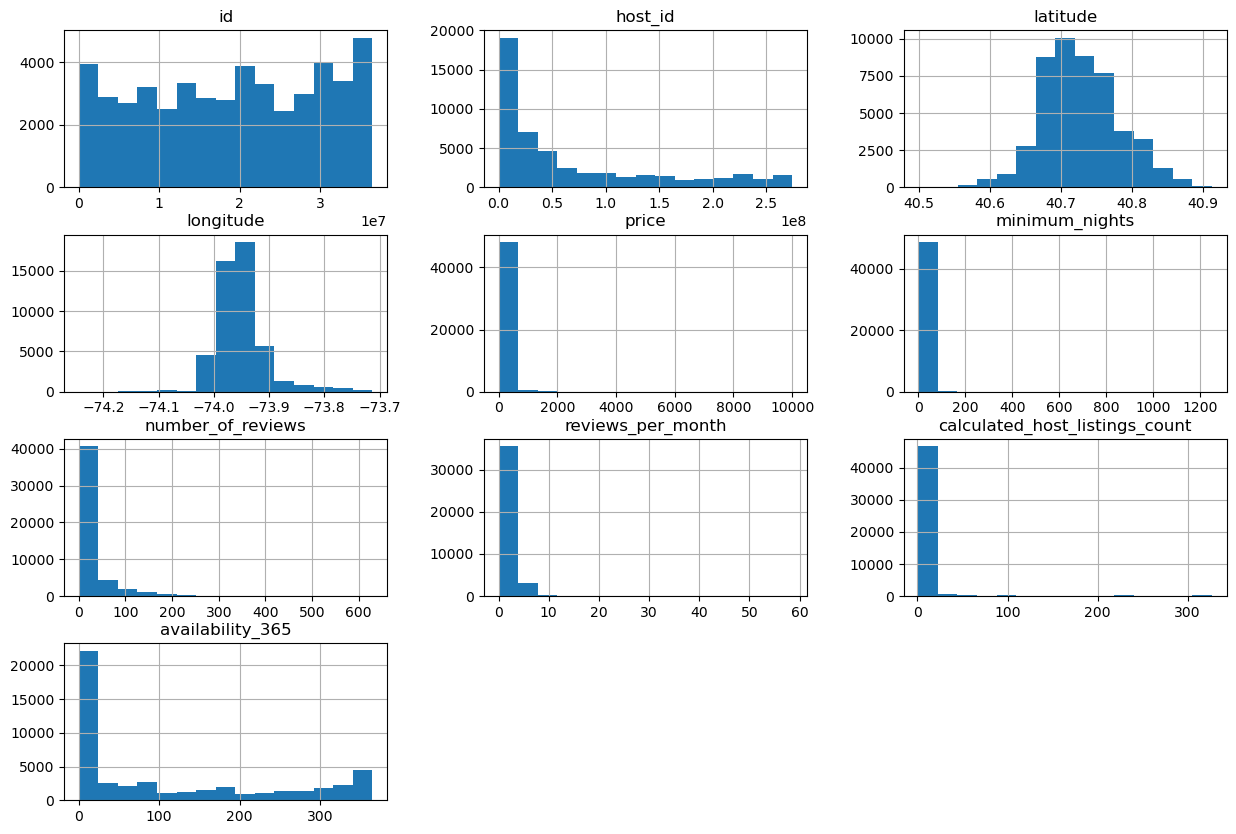

In [23]:
ny.hist(bins=15, figsize=(15,10));

Looking at the histograms, we can notice that some important variables like `price` and `minimum_nights` our poorly distributed. In order to better identify these problems, let's see more statistics about the dataset using the `describe` method.

In [24]:
ny[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


It is easy to see that some values do not make sense. Let's look at the `price` column for instance. The average price is \$163.13 and 75% of that prices are below \$175, however, the maximum price is \$10,000. Also, the minimum value is $0.

The same happens in the `minimum_nights` column, where the maximum value is 1,250! It makes absolutely no sense!

Values like these distort reality and any analysis we attempt to perform. Now we'll have to deal with them.

### Removing Outliers

We'll plot boxplots for each of these columns so we can take a closer look at their distribution.

Also, let's see how many and what percentages of prices are equal to \$0 and over $500.00 and the percentages of minimum nights that are over 30 nights.

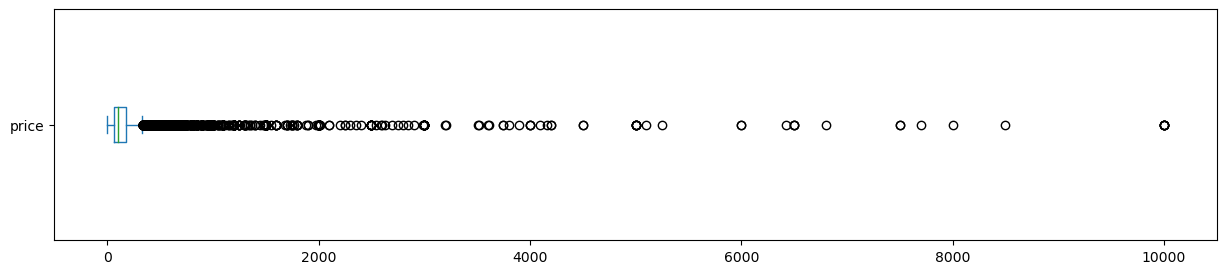

Values over $500.00: 
1044
2.1352%


Values equal to $0: 
11
0.0225%


In [25]:
# Displaying the box plot
ny['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to $0 and over $500.00
print('Values over $500.00: ')
print(len(ny[ny['price'] > 500]))
print('{:.4f}%'.format((len(ny[ny['price'] > 500]) / ny.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(ny[ny['price'] == 0]))
print('{:.4f}%'.format((len(ny[ny['price'] == 0]) / ny.shape[0]) * 100))

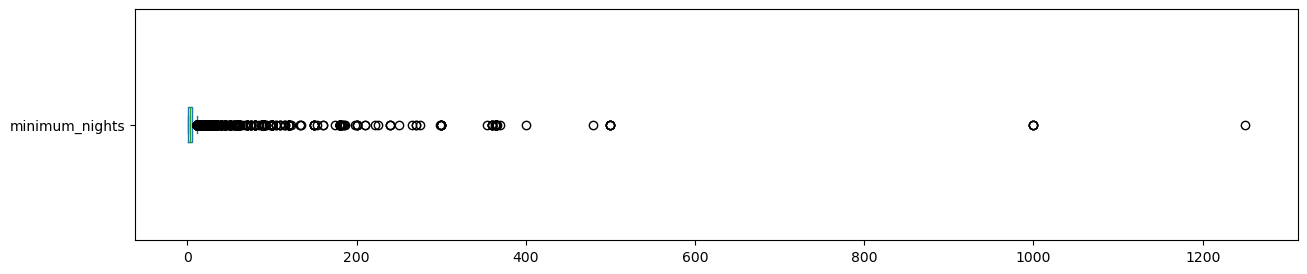

Values over 30 nights: 
747
1.5278%


In [26]:
# Displaying the box plot
ny['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(ny[ny['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(ny[ny['minimum_nights'] > 30]) / ny.shape[0]) * 100))

We can see that only 2.27% of the `price` column is above \$500.00 and only 1.54% of the values in the `minimum_nights` column is above 30. We have 26 elements with price zero as well.

Taking into consideration, as we said earlier, that 75% of these columns' values are below \$175.00 and 5 nights, respectively, it is reasonable to lose roughly 3.8% of the data in order to make it more realistic. Therefore, we'll create a new dataframe, `ny_clean`, that contains only the rows in which the price is more than \$0 and less than $500, and the minimum nights is no more than 30.

Also, probably some columns fulfill both these requirements, which means that we are losing even less than 3.8% of the dataset.

After we create the new dataframe, we'll drop the `reviews_per_month` and `last_review` columns as we said earlier in the project.

Finally, let's see if the histograms look better.

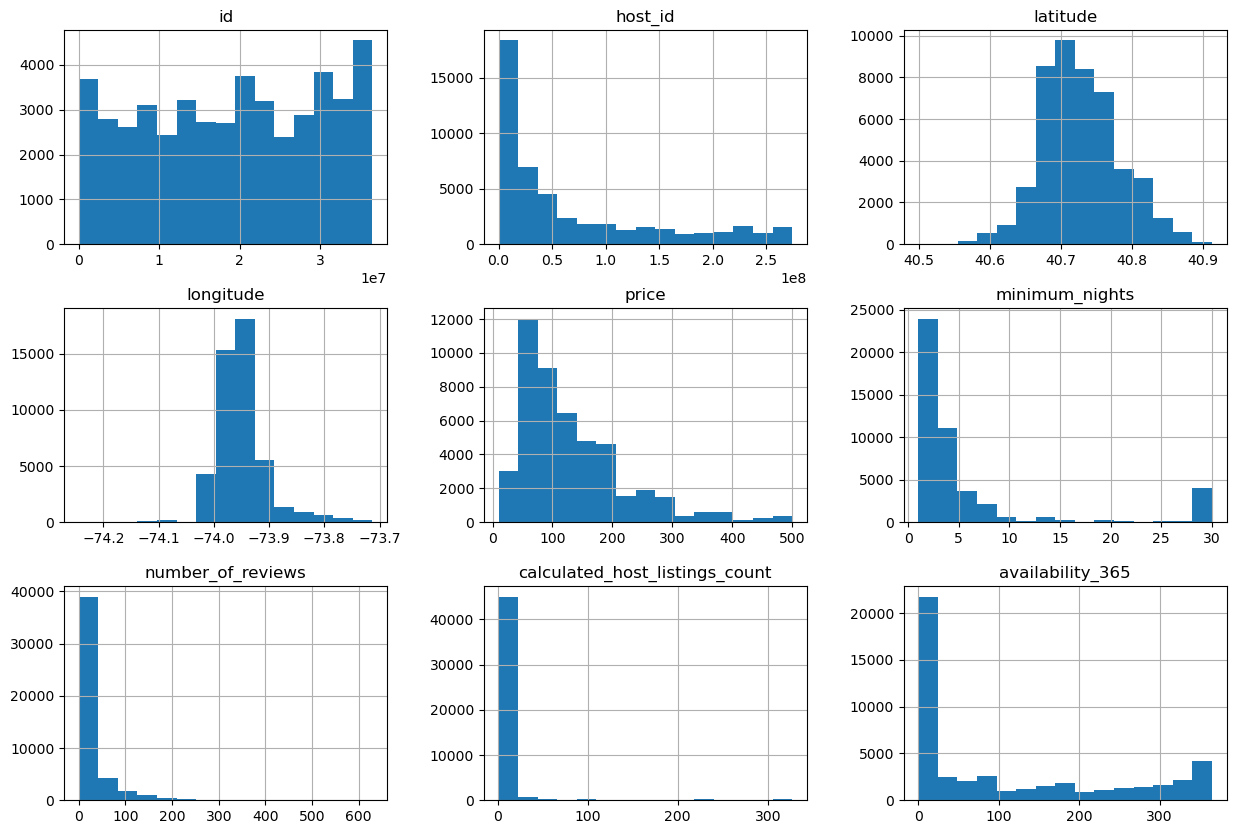

In [27]:
# Selecting the rows that fulfil the established requirements
ny_clean = ny[(ny['price'] <= 500) & (ny['price'] > 0) & (ny['minimum_nights'] <= 30)].copy()

# Droping the columns
ny_clean.drop(['reviews_per_month', 'last_review'], axis=1, inplace=True)
ny_clean.reset_index(drop=True, inplace=True)

# Plotting the histograms againd
ny_clean.hist(bins=15, figsize=(15,10));

We can still see, for example, that the most common prices are still below U$100.00, but the distribution is much more realistic now.

### Correlations

Now let's see if there's any correlation between the numeric variables in the dataset.

We'll first create a correlation matrix using the `corr` method and then we will take advantage of the `heat_map` function from `seaborn` to visualize this matrix.  

In [28]:
corr = ny_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.054697,-0.048772,0.162603,0.093187
minimum_nights,0.054697,1.000000,-0.148999,0.332898,0.242084
number_of_reviews,-0.048772,-0.148999,1.000000,-0.072440,0.182621
calculated_host_listings_count,0.162603,0.332898,-0.072440,1.000000,0.229478
availability_365,0.093187,0.242084,0.182621,0.229478,1.000000


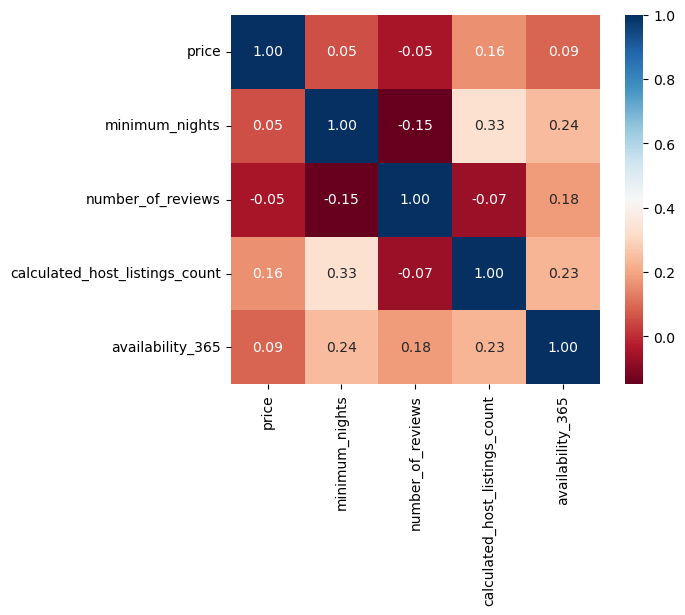

In [29]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

As we can see, the variables do not seem to be significantly correlated to one another.

## Data Cleaning
We dont require host_id,name,id,host_name and last_review as these do not any way effect for further analysis or pre-processing. So we can drop them.

In [34]:
## We can remove the unwanted columns. Here id,name , host_name and last_review doesnt help us in anyway in our approch for data analysis.
ny.drop(['host_id','name','latitude','longitude','id','host_name','last_review'], axis=1, inplace=True)
ny.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


Since we removed 4 columns from the dataframe, we now have to deal with 12 columns.

In [40]:
ny.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [41]:
ny['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

We can actually fill all the rows of column of reviews_per_month as 0 where its null value, this is because the data is null only because no one has reviewd it and hence the number of review is 0 here.

In [44]:
ny['reviews_per_month'] = ny['reviews_per_month'].fillna(0)
# Missing value implies there are no reviews for the location.

In [46]:
ny.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In the availablity_365 , if we have 365 days availablity then we can directly assgn them as 365 itself and 0 for rest because they isnt availavle for 365 days.